In [11]:
#Importando Biblioteca - YahooFinance para baixar cotações
import yfinance as yF

#Manipulação de Dados
import numpy as np
import pandas as pd

#Visualizações
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

#Estatitica
import scipy
import warnings #tirar alertas de att nas funcoes
warnings.filterwarnings("ignore")

#Formatação dos Gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10

#Casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [12]:
#Carregando Dataset

cotacoes = yF.Ticker("BTC-USD")

#Periodos - Podem ser: 1d, 5d, 1mo, 3mo, 6mo, 1y, ....10y, ytd.

dados = cotacoes.history(period="1y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-07 00:00:00+00:00,61554.92,63326.99,61432.49,63326.99,24726754302,0,0
2021-11-08 00:00:00+00:00,63344.07,67673.74,63344.07,67566.83,41125608330,0,0
2021-11-09 00:00:00+00:00,67549.73,68530.34,66382.06,66971.83,42357991721,0,0
2021-11-10 00:00:00+00:00,66953.34,68789.62,63208.11,64995.23,48730828378,0,0
2021-11-11 00:00:00+00:00,64978.89,65579.02,64180.49,64949.96,35880633236,0,0


In [13]:
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume'] #traduzindo

In [14]:
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2021-11-07 00:00:00+00:00,61554.92,63326.99,61432.49,63326.99,24726754302
2021-11-08 00:00:00+00:00,63344.07,67673.74,63344.07,67566.83,41125608330
2021-11-09 00:00:00+00:00,67549.73,68530.34,66382.06,66971.83,42357991721
2021-11-10 00:00:00+00:00,66953.34,68789.62,63208.11,64995.23,48730828378
2021-11-11 00:00:00+00:00,64978.89,65579.02,64180.49,64949.96,35880633236


In [15]:
#Range de Dados
print('Menor Data: ', dados.index.min())
print('Maior Data: ', dados.index.max())

Menor Data:  2021-11-07 00:00:00+00:00
Maior Data:  2022-11-07 00:00:00+00:00


In [21]:
#Estudando ultima data - Atual
display(dados.loc[dados.index.max()]) #utilizaremos para projeção

Abertura           20932.58
Maximo             20943.18
Minimo             20900.29
Fechamento         20900.29
Volume       35817656320.00
Name: 2022-11-07 00:00:00+00:00, dtype: float64

In [22]:
# % de mudança na cotação de fechamento diario 
retorno_diario = dados['Fechamento'].pct_change().dropna()
retorno_diario.head()

Date
2021-11-08 00:00:00+00:00    0.07
2021-11-09 00:00:00+00:00   -0.01
2021-11-10 00:00:00+00:00   -0.03
2021-11-11 00:00:00+00:00   -0.00
2021-11-12 00:00:00+00:00   -0.01
Name: Fechamento, dtype: float64

In [23]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on = 'Date')
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume', 'Variacao_Diaria']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
Date,,,,,,
2021-11-08 00:00:00+00:00,63344.07,67673.74,63344.07,67566.83,41125608330,0.07
2021-11-09 00:00:00+00:00,67549.73,68530.34,66382.06,66971.83,42357991721,-0.01
2021-11-10 00:00:00+00:00,66953.34,68789.62,63208.11,64995.23,48730828378,-0.03
2021-11-11 00:00:00+00:00,64978.89,65579.02,64180.49,64949.96,35880633236,-0.00
2021-11-12 00:00:00+00:00,64863.98,65460.82,62333.91,64155.94,36084893887,-0.01


In [24]:
#tipo de dados
dados.dtypes

Abertura           float64
Maximo             float64
Minimo             float64
Fechamento         float64
Volume               int64
Variacao_Diaria    float64
dtype: object

In [25]:
#shape
dados.shape

(364, 6)

In [26]:
#Descrição Estatistica
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
count,364.00,364.00,364.00,364.00,364.00,364.00
mean,33848.05,34523.06,32990.99,33719.98,30902591983.34,-0.00
std,12693.32,12936.17,12323.87,12595.00,10106357756.77,0.03
min,18534.65,19134.73,17708.62,18547.40,13736557863.00,-0.16
25%,20917.65,21476.80,20540.32,20894.60,24367636818.75,-0.02
50%,34553.69,34862.51,32235.11,32925.79,29622090653.00,-0.00
75%,42751.91,43508.77,41958.86,42627.64,35721924658.00,0.01
max,67549.73,68789.62,66382.06,67566.83,84196607520.00,0.15


## Visualizando o Preço Diário de Fechamento

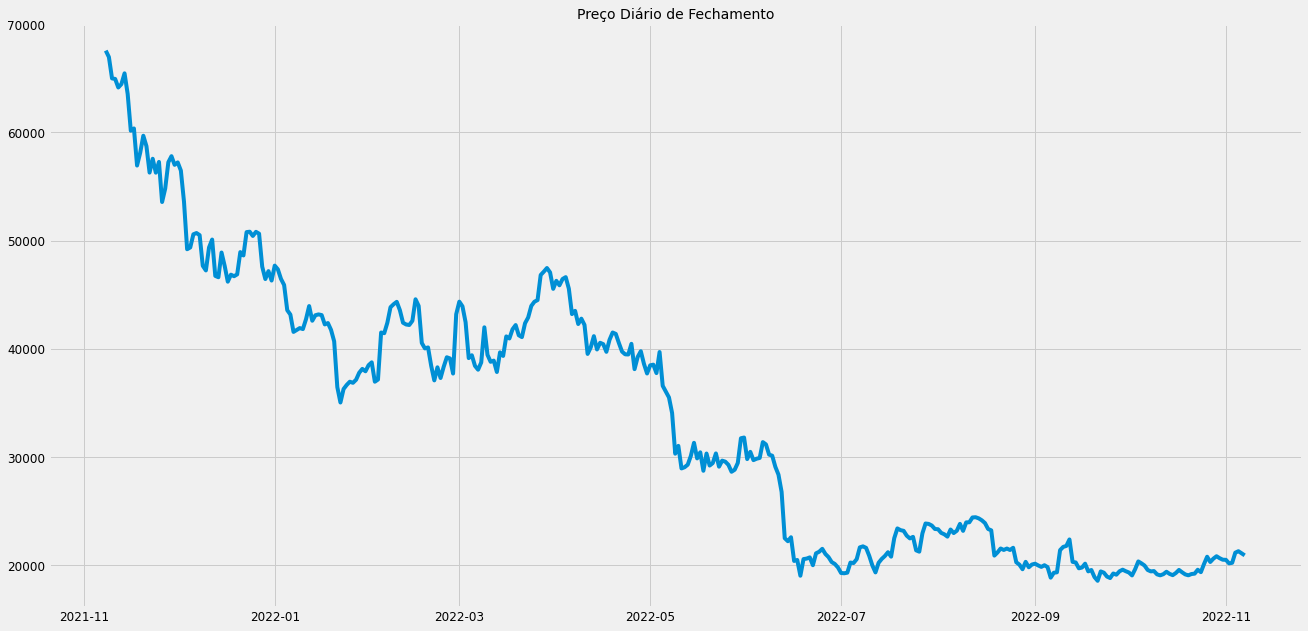

In [27]:
#Plot
plt.plot(dados['Fechamento'])
plt.title("Preço Diário de Fechamento", size = 14)
plt.show()

In [31]:
#Retorno acumulado

retorno_acumulado = (1 + retorno_diario).cumprod() - 1 #cumprod = valor acumulado 

In [33]:
retorno_acumulado.max() #utilizar na projecao

0.06695154718111462

In [34]:
#Med e DesvPadrao
media_retorno_diario = np.mean(retorno_diario)

In [35]:
desvpad_retorno_diario = np.std(retorno_diario)

In [36]:
print("Media do Retorno de Fechamento:", media_retorno_diario)
print("Desvio Padrão do Retorno de Fechamento:", desvpad_retorno_diario)

Media do Retorno de Fechamento: -0.002482072504158444
Desvio Padrão do Retorno de Fechamento: 0.03327532309130858


In [37]:
#Media e Desvio Padrão no ano (364 dias de operacao - e nao 252 igual ETFs e Acoes do BID)

print("Media do Retorno de Fechamento:", (1 + media_retorno_diario) ** 364 - 1)
print("Desvio Padrão do Retorno de Fechamento:", desvpad_retorno_diario**np.sqrt(364))

Media do Retorno de Fechamento: -0.59529525190499
Desvio Padrão do Retorno de Fechamento: 6.366345134943073e-29


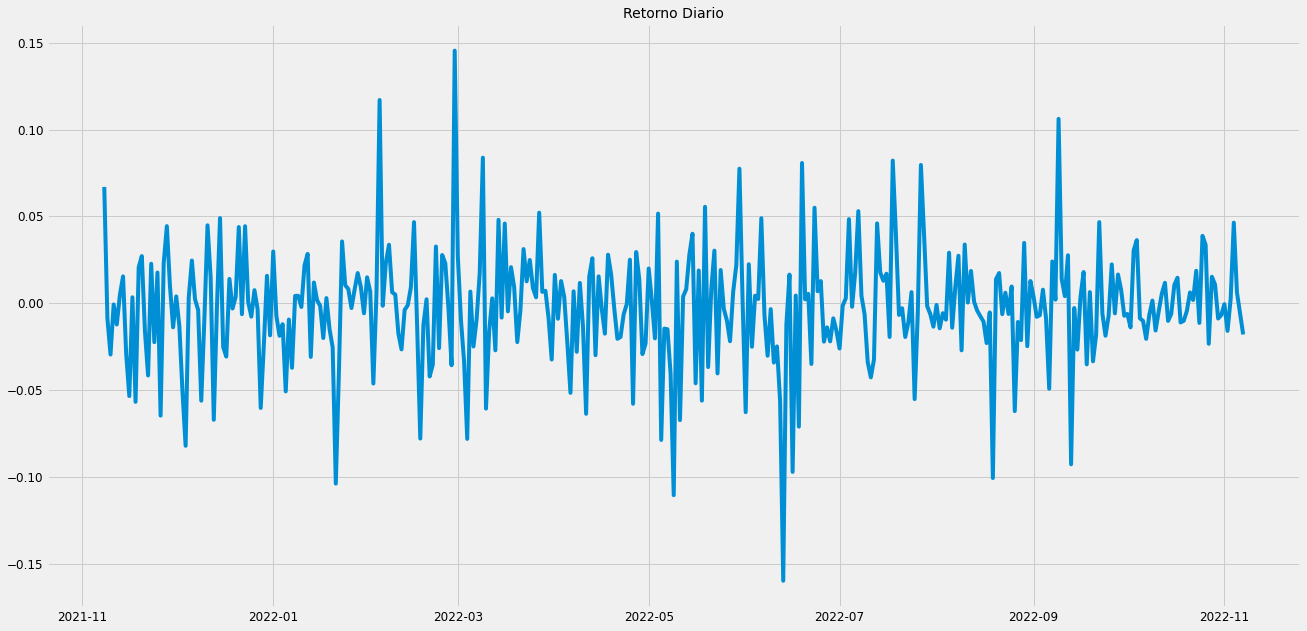

In [38]:
#Plot retorno diario
plt.plot(retorno_diario)
plt.title('Retorno Diario', size = 14)
plt.show()

O retorno diario tem sido constante ao longo do tempo.
Mostraremos em um histograma a distribuição do retorno diário

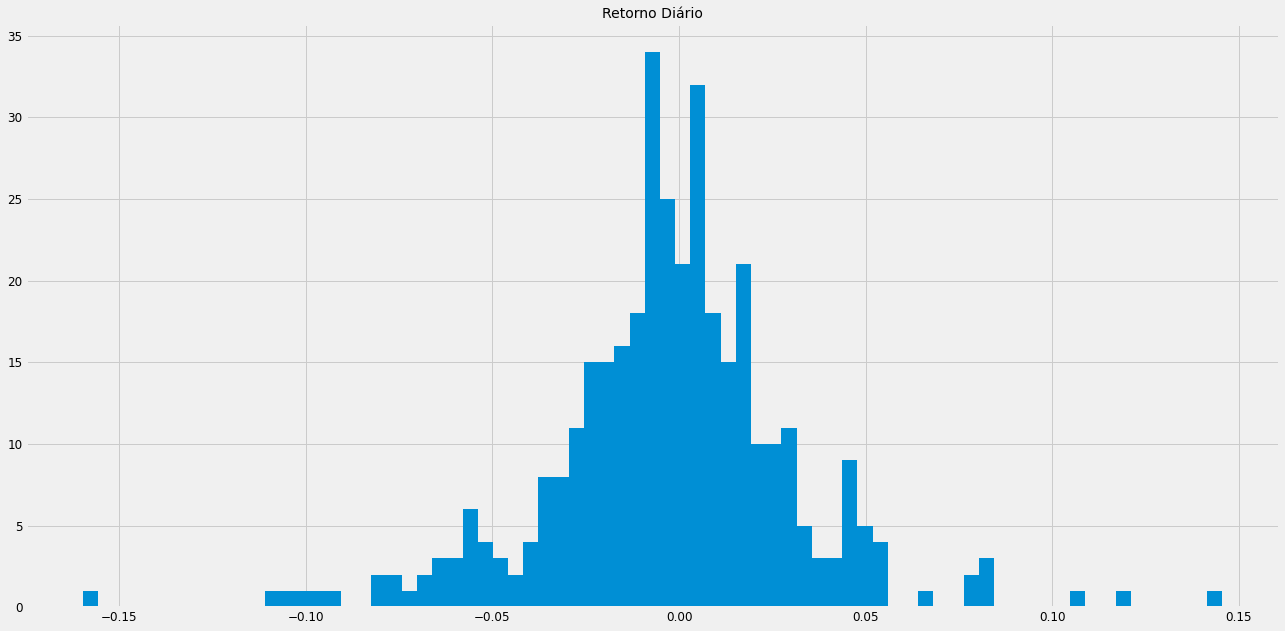

In [39]:
plt.hist(retorno_diario, bins = 75)
plt.title("Retorno Diário", size = 14)
plt.show()

Valores bem próximos a média

In [41]:
#transformação de logaritmo na coluna de fechamento - alterar escala dos dados p/evitar muitas tratativas
log_retorno_diario = (np.log(dados['Fechamento'])) - np.log(dados['Fechamento']).shift(-1).dropna()

#Media e dev padrao após transformação
log_med_ret_diario = np.mean(log_retorno_diario)
log_dev_pad_ret_diario = np.std(log_retorno_diario)

<function matplotlib.pyplot.show(close=None, block=None)>

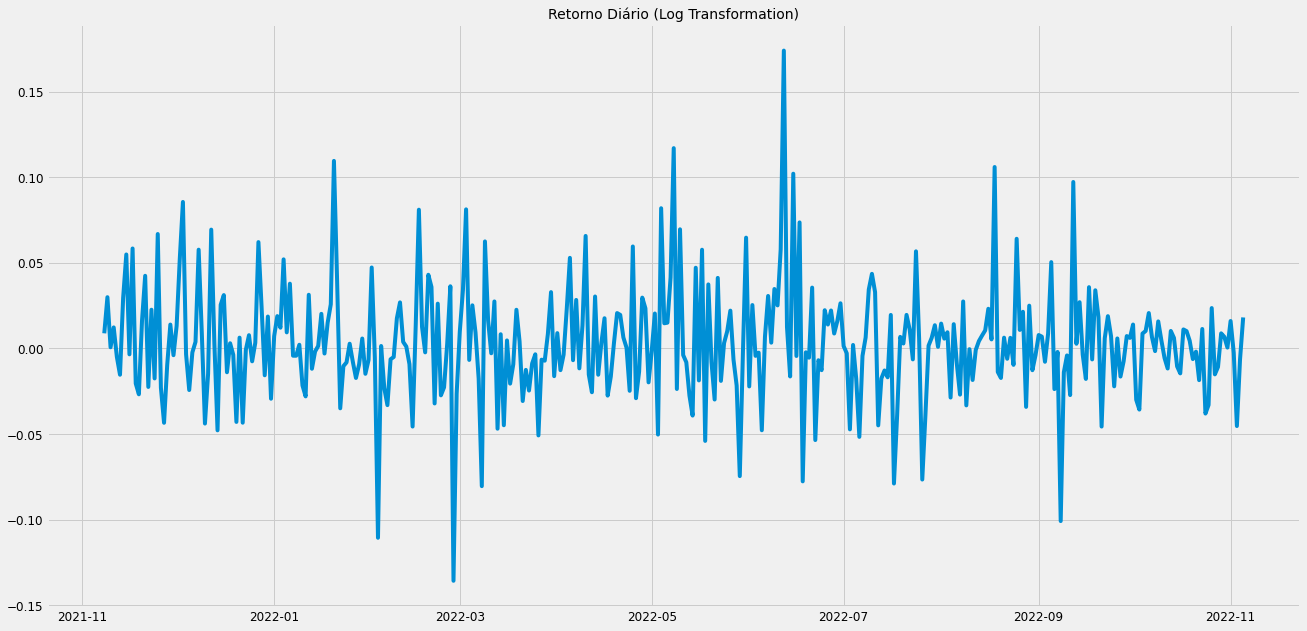

In [42]:
#plot da serie transformada
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 14)
plt.show

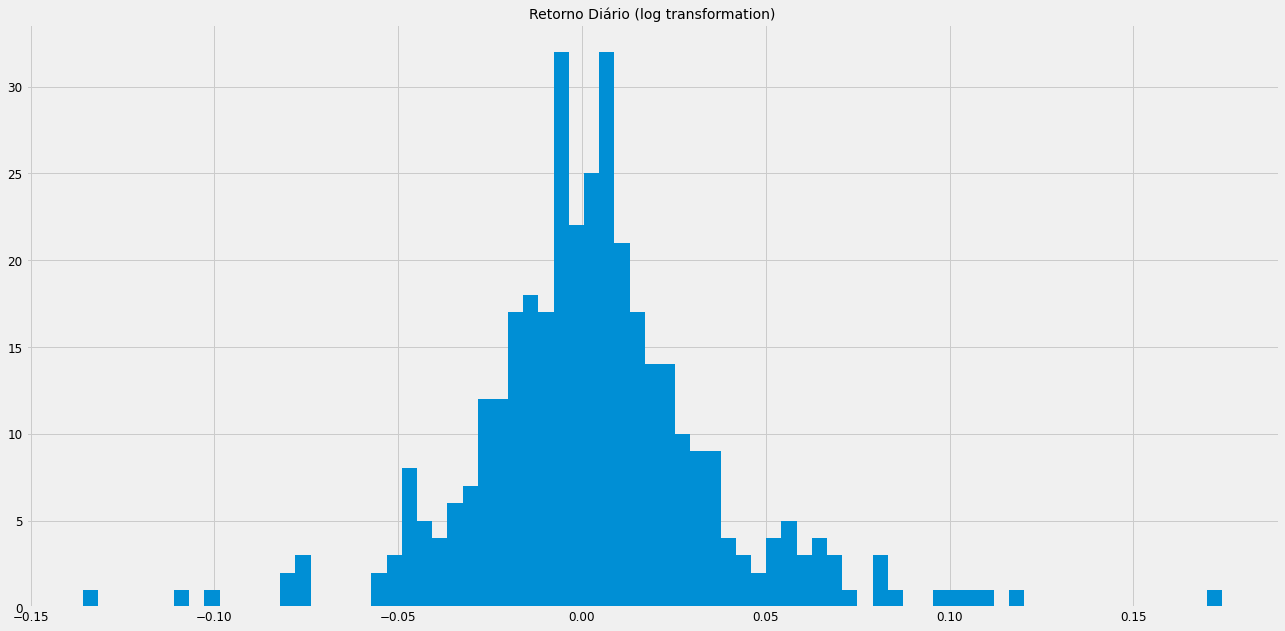

In [43]:
plt.hist(log_retorno_diario, bins = 75)
plt.title("Retorno Diário (log transformation)", size = 14)
plt.show()

## Projeção 180 Dias - Monte Carlo Simulation

In [51]:
#Num de dias a frente
dias_posteriores = 180

#Num de Simulacoes
simulacoes = 2500

#Ultimo valor da ação
ultimo_preco = 20943.18

#Array Vazio com as dimensões
results = np.empty((simulacoes, dias_posteriores))

#Looping para cada simulaçao
for s in range(simulacoes):
    #retorno com dados randoms seguindo distruibuicao normal
    random_returns = 1 + np.random.normal(loc = log_med_ret_diario,
                                           scale = log_dev_pad_ret_diario,
                                           size = dias_posteriores)
    
    result = ultimo_preco * (random_returns.cumprod())
    
    results[s, :] = result

In [52]:
#index da serie simulada
index = pd.date_range("2022-11-06", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

## Resultado da Projeção

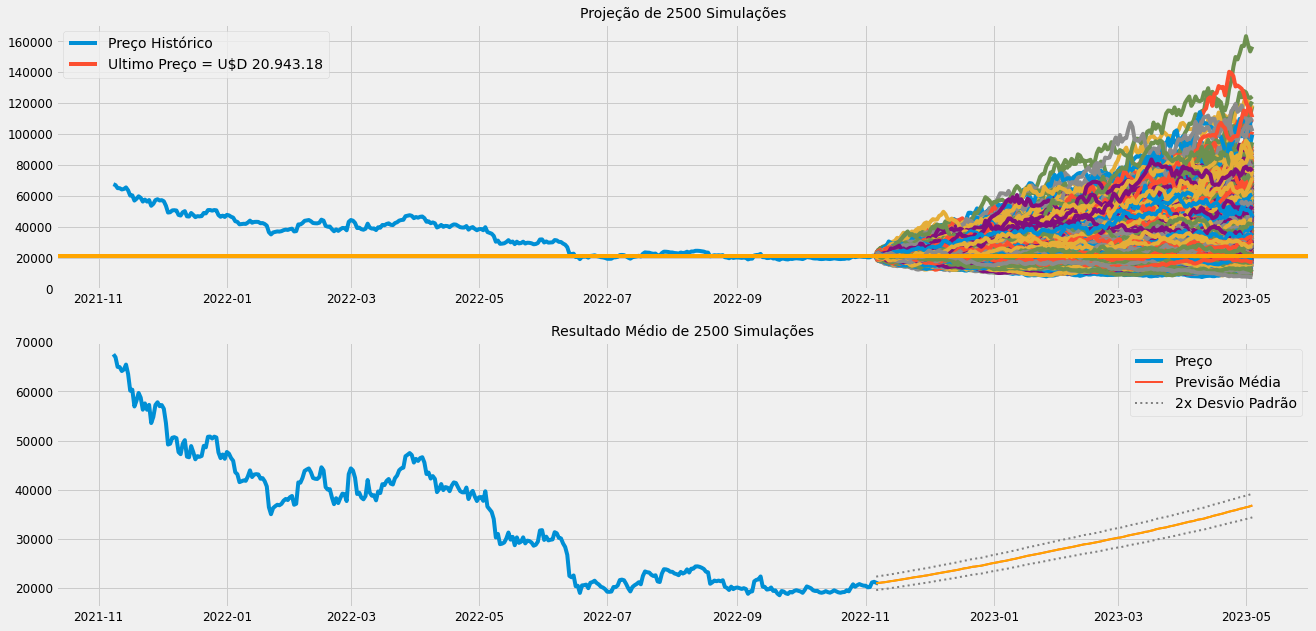

In [57]:
#Div plot em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

#Plot
ax[0].plot(dados['Fechamento'][:"2023-04-30"])
ax[0].plot(resultados)
ax[0].axhline(20943.18, c = 'orange')
ax[0].set_title(f"Projeção de {simulacoes} Simulações", size = 14)
ax[0].legend(["Preço Histórico", "Ultimo Preço = U$D 20.943.18"])

ax[1].plot(dados['Fechamento'][:"2023-04-30"])
ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)
ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_dev_pad_ret_diario))),
           lw = 2, linestyle = 'dotted', c = 'gray')
ax[1].plot(media_resultados, lw = 2, c = 'orange')
ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_dev_pad_ret_diario))),
           lw = 2, linestyle = 'dotted', c = 'gray')
ax[1].set_title(f"Resultado Médio de {simulacoes} Simulações", size = 14)
ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrão"])

plt.show()